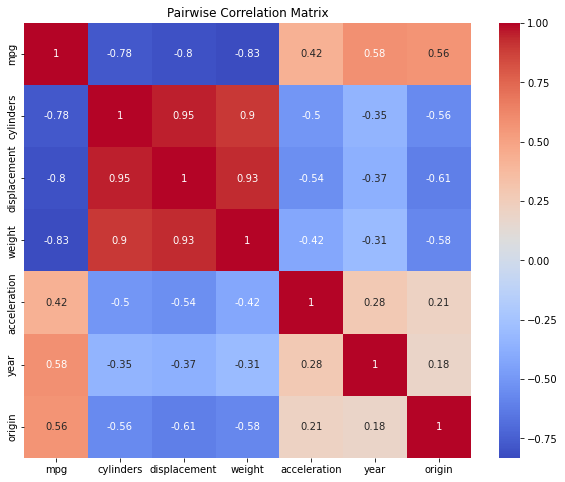

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
auto_data = pd.read_csv('Auto.csv')

# Display the first few rows of the data
auto_data.head()

# Compute the pairwise correlation matrix
correlation_matrix = auto_data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Pairwise Correlation Matrix')
plt.show()

In [2]:
# Replace '?' with NaN to handle missing values
auto_data.replace('?', np.nan, inplace=True)

# Drop rows with missing values
auto_data.dropna(inplace=True)

# Convert necessary columns to numeric (if needed)
auto_data['horsepower'] = pd.to_numeric(auto_data['horsepower'])

# Drop the 'name' column, as it is not numeric and not needed for modeling
X = auto_data.drop(columns=['mpg', 'name'])  # Drop 'name' column
y = auto_data['mpg']  # Target variable

# Classify MPG as 'Good' or 'Bad' based on the median value
y = np.where(y >= y.median(), 'Good', 'Bad')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
# Train a neural network model (MLP) with two hidden layers
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, early_stopping=True, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Predict the test set using the trained neural network
y_pred_mlp = mlp.predict(X_test_scaled)

# Calculate and print the accuracy of the neural network model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Neural Network Model Accuracy: {accuracy_mlp:.2f}")

Neural Network Model Accuracy: 0.83


In [4]:
# Train a logistic regression model without regularization
log_reg = LogisticRegression(penalty='none', max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict the test set using the trained logistic regression model
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Calculate and print the accuracy of the logistic regression model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Model Accuracy: {accuracy_log_reg:.2f}")

# Display the coefficients of the logistic regression model
coefficients = pd.DataFrame(log_reg.coef_, columns=X.columns)
print(coefficients)

Logistic Regression Model Accuracy: 0.87
   cylinders  displacement  horsepower    weight  acceleration      year  \
0  -1.078784      2.000014   -2.045946 -4.137333      -0.05816  1.715385   

     origin  
0  0.767474  


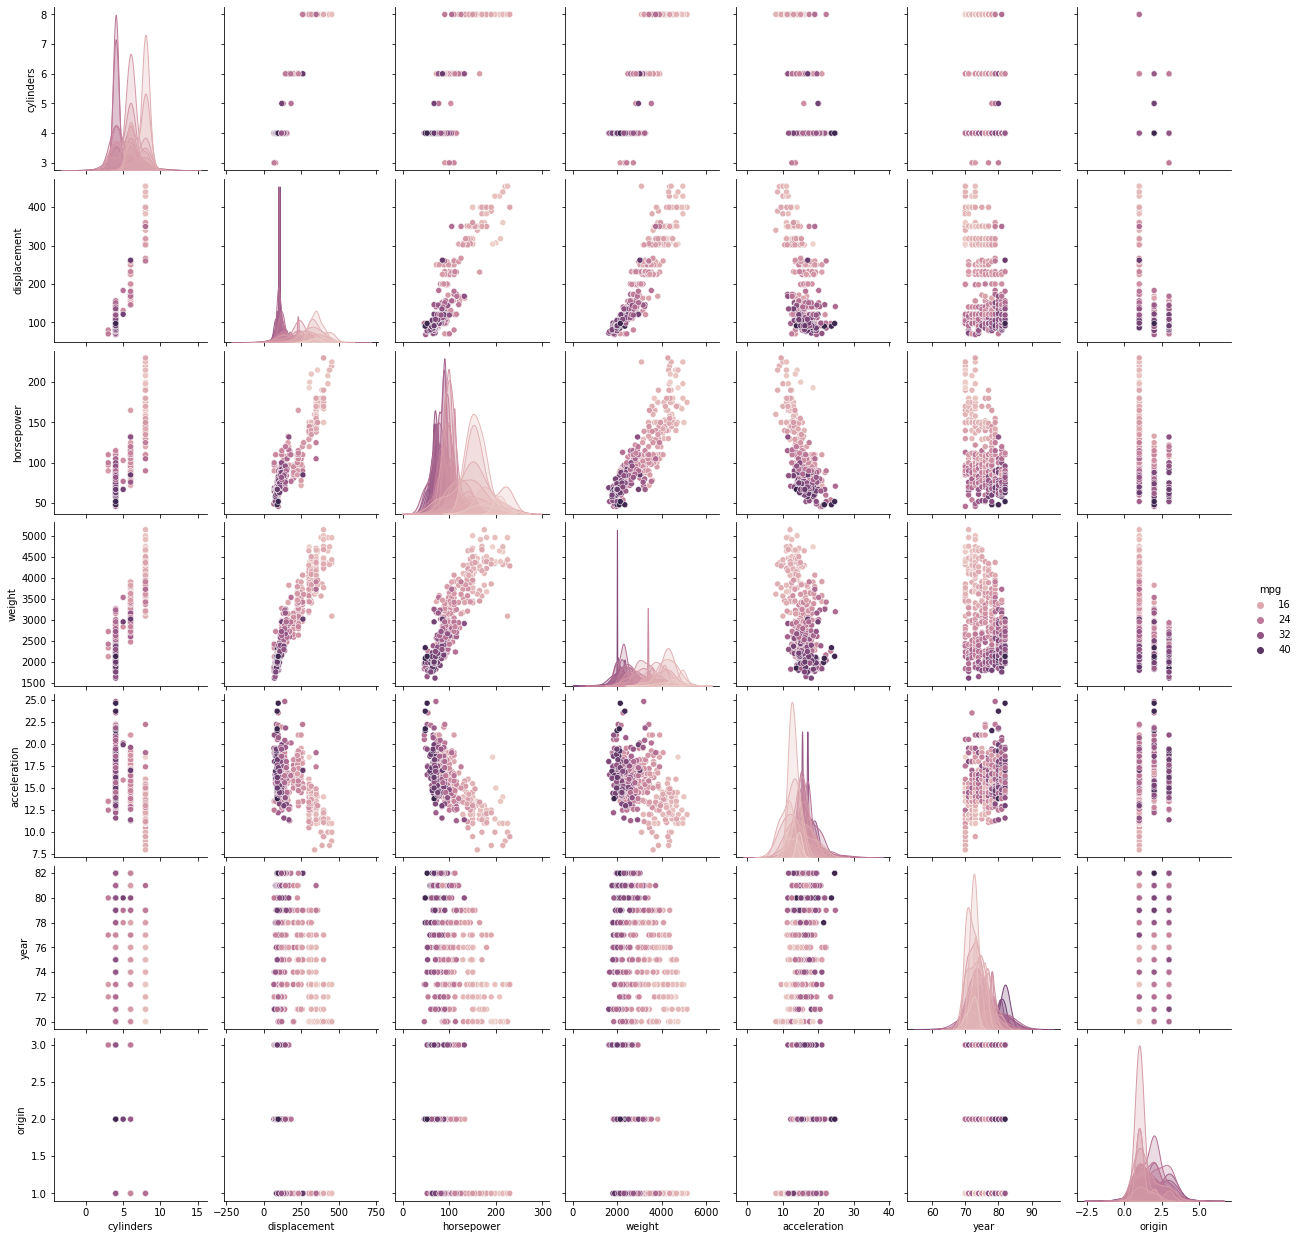

Selected Features Logistic Regression Model Accuracy: 0.86


In [5]:
# Plot pairwise scatter plots to visualize the relationship between features
sns.pairplot(auto_data, hue='mpg')
plt.show()

# Select two features for logistic regression (e.g., 'horsepower' and 'weight')
X_selected_train = X_train[['horsepower', 'weight']]
X_selected_test = X_test[['horsepower', 'weight']]

# Scale the selected features
X_selected_train_scaled = scaler.fit_transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

# Train logistic regression using the two selected features
log_reg_selected = LogisticRegression(penalty='none', max_iter=1000, random_state=42)
log_reg_selected.fit(X_selected_train_scaled, y_train)

# Predict the test set using the selected feature logistic regression model
y_pred_log_reg_selected = log_reg_selected.predict(X_selected_test_scaled)

# Calculate and print the accuracy of the selected feature logistic regression model
accuracy_log_reg_selected = accuracy_score(y_test, y_pred_log_reg_selected)
print(f"Selected Features Logistic Regression Model Accuracy: {accuracy_log_reg_selected:.2f}")
